# Dataset

"many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galápagos archipelago.

Particularly in the study of the small birds, called finches, that inhabit them. 

The islands are ideal for studying evolution because they are isolated so they do not have complicated effects from interactions with other species including humans. 


Furthermore, some of them are small, so entire populations can be monitored on a given island. 


Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny volcanic cinder cone island of Daphne Major in the Galápagos.


This island has two dominant ground finch species, Geospiza fortis and Geospiza scandens. The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing, and more.


In 2014,
they published a book entitled "40 Years of Evolution: Darwin's Finches on Daphne Major Island". They generously placed all of their data on the Dryad data repository making it free for anyone to use. The data set is impressive and a great set for using data science and statistical inference to learn about evolution." 
Justin Bois-Lecturer at the California Institute of Technology

## Citation
Grant, Peter R.; Grant, B. Rosemary (2013), Data from: 40 years of evolution. Darwin's finches on Daphne Major Island, Dryad, Dataset, https://doi.org/10.5061/dryad.g6g3h

This analysis was carried out as part of datacamp guided course: Statistical Thinking in Python

# Data importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir= '/Users/Abdelrahman/scrape/New folder'

columns= ['band', 'species', 'BL', 'BD']

data_75= pd.read_csv('data_75.csv', index_col=None,names= columns, header=0, engine='python')
data_12= pd.read_csv('data_12.csv', index_col=None,names= columns, header=0, engine='python')

In [3]:
data_75['year']=1975
data_75.head()


,band,species,BL,BD,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [4]:
data_12['year']= 2012
data_12.head()

,band,species,BL,BD,year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012


# Data preperation and cleaning

In [5]:
# creating splits by species for the 1975 data
scandens_df_75= data_75[data_75['species'] == 'scandens']
fortis_df_75= data_75[data_75['species'] == 'fortis']

In [6]:
# creating splits by species for the 2012 data
scandens_df_12= data_12[data_12['species'] == 'scandens']
fortis_df_12= data_12[data_12['species'] == 'fortis']

In [7]:
# creating a df for G.scandens with both 1975 and 2012 data
data=pd.concat([scandens_df_75, scandens_df_12])
data.reset_index(inplace= True)

In [8]:
# examining columns types
data.dtypes

index        int64
band        object
species     object
BL         float64
BD          object
year         int64
dtype: object

In [9]:
# droping null values
data.dropna(inplace= True)
data['BD']= data['BD'].astype('float64')

In [10]:
data.head()

,index,band,species,BL,BD,year
0,316,302,scandens,13.9,8.4,1975
1,317,304,scandens,14.0,8.8,1975
2,318,306,scandens,12.9,8.4,1975
3,319,310,scandens,13.5,8.0,1975
4,320,317,scandens,12.9,7.9,1975


In [11]:
# Creating splits for scandens data by year
data_75= data[data['year']== 1975]
print(data_75.head())
data_12= data[data['year']== 2012]
print(data_12.head())
data_12= data_12.reset_index()

   index band   species    BL   BD  year
0    316  302  scandens  13.9  8.4  1975
1    317  304  scandens  14.0  8.8  1975
2    318  306  scandens  12.9  8.4  1975
3    319  310  scandens  13.5  8.0  1975
4    320  317  scandens  12.9  7.9  1975
    index   band   species    BL    BD  year
87    121  19026  scandens  14.3   9.4  2012
88    122  19028  scandens  12.5   8.9  2012
89    123  19029  scandens  13.7   9.5  2012
90    124  19094  scandens  13.8  11.0  2012
91    125  19122  scandens  12.0   8.7  2012


# EDA on G.scandans Beak depth data 

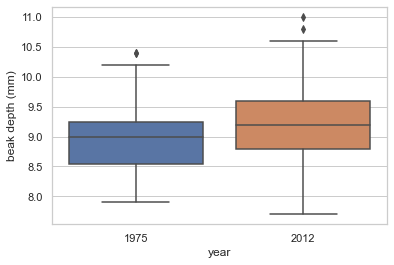

In [12]:
sns.set_theme(style="whitegrid")

#ax= sns.swarmplot(x="year", y="BD", data=data)
ax= sns.boxplot(x="year", y="BD", data=data)

ax = plt.xlabel('year')
ax = plt.ylabel('beak depth (mm)')

plt.show()

In [13]:
def ecdf(data):
    """Compute Empirical CDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y


In [14]:
# Computing ECDFs for beak depth of each year 
x_1975, y_1975 = ecdf(data_75['BD'])
x_2012, y_2012 = ecdf(data_12['BD'])

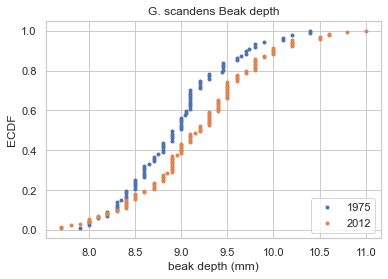

In [15]:
# Ploting the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')
plt.title('G. scandens Beak depth')

plt.show()

By just looking at the box plot and the ecdf, it is clear that the G. scandens beaks are getting deeper over time...

# Parameter Estimation

In [16]:
# computing diff of sample means
mean_diff = np.mean(data_12['BD']) - np.mean(data_75['BD'])
print(mean_diff)

0.2262204724409429


## Question: If the data was acquired again would we get the same value for parameters?
In inferece problem the focus isn't the result of a single measurments or a single data acquisition.

The focus is estimating the true parameters, in this case if the beak depths of all the G. scandens on the island was measered what would be the parameters of the distribution? 

The True paramertes can't be calculated but, what can be done is simulating getting the parameters many times by resampling(with replacment) the data already present.

This process is called Bootstraping: use of resampled data to perform statistical inference.

The Bootstrap samples is then used to calulate Bootstrap replicas: a statistic computed from sampled data.


In [17]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [18]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initializeing array of replicates
    bs_replicates = np.empty(size)

    # Generating replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [19]:
# Generating boot strap samples and geeting BS replicates of sample mean
bs_replicates_1975 = draw_bs_reps(data_75['BD'], np.mean, size= 10000)
bs_replicates_2012 = draw_bs_reps(data_12['BD'], np.mean, size= 10000)


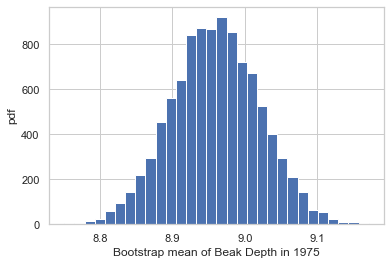

In [20]:
# Visualising the ditribution of the Bootstrap replicas for the 1975 data
plt.hist(bs_replicates_1975, bins= 30)
plt.xlabel('Bootstrap mean of Beak Depth in 1975')
plt.ylabel('pdf')
plt.show()

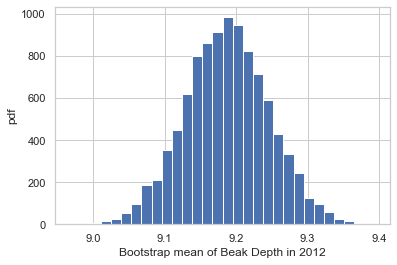

In [21]:
# Visualising the ditribution of the Bootstrap replicas for the 2012 data
plt.hist(bs_replicates_2012, bins= 30)
plt.xlabel('Bootstrap mean of Beak Depth in 2012')
plt.ylabel('pdf')
plt.show()

### Confidence interval
It is usefull to summerizethe distrubution of Bootstrap replicas using confidence interval.
That is : P% of the Bootstrape Resampled replicas would lie within P% Confidence interval

In [22]:
# Computing diff of BS replicates of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Computing 95% confidence interval
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.06128831 0.39131274] mm


# Hypothesis testing 
It pretty clear that the beaks of G. scandens have gotten deeper. But is it possible that this effect is just due to random chance?

### Question: what is the probability that we would get the observed difference in mean beak depth if the means were the same?

### Hypotheis test pipeline:
- Clearly state null hypothesis: if the true means of the 1975 and 2012 data were equal what is the probability that we get the observed difference? 

- Generating many sets of Simulated data (Bootstraping) assuming that the null hypothesis is true: by shifting both datasets into there combined mean.

- Compute mean for each simulated data (Bootstrap replica).

- calculating the P-value: that is the fraction of simulated replicas for which the mean is at least as extreme as the mean of the real data 

In [23]:
# Computing mean of combined data set
combined_mean = np.mean(np.concatenate((data_75['BD'], data_12['BD'])))

# Shifting the samples
bd_1975_shifted = data_75['BD'] - np.mean(data_75['BD']) + combined_mean
bd_2012_shifted = data_12['BD'] - np.mean(data_12['BD']) + combined_mean

# Getting bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Computing replicates of difference of means
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Computing the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print('p =', p)


p = 0.0042


The P-value calculated suggests without a doubt that there is a statisticaly significant differnece

# Eda on G.scandans Beak depth and length

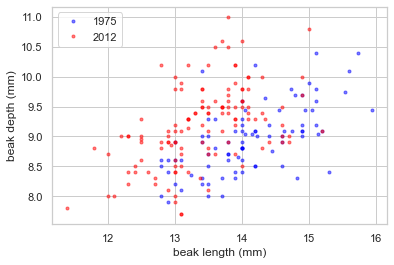

In [24]:
# scatter plot of 1975 data
plt.plot(data_75['BL'], data_75['BD'], marker='.',
             linestyle='None', alpha=0.5, color='blue')

# scatter plot of 2012 data
plt.plot(data_12['BL'], data_12['BD'], marker='.',
             linestyle='None', alpha=0.5, color='red')

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

plt.show()

By looking at the plot we notice that the red dots are higher than the blue ones --> Beaks got deeper.
Its is noticable as well that the red dots appear to be further to the left of the plot --> Beaks are getting shorter as well ?

### Question: how do beak depth and length vary togther ?
This question can be answered by plotting a linear regression model and estimating its parameters

In [25]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Setting up array of indices to sample from
    inds = np.arange(len(x))

    # Initializing replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generating replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


In [26]:
# Computing the linear regressions
slope_1975, intercept_1975 = np.polyfit(data_75['BL'], data_75['BD'], 1)
slope_2012, intercept_2012 = np.polyfit(data_12['BL'], data_12['BD'], 1)

# Performing pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(data_75['BL'], data_75['BD'], 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(data_12['BL'], data_12['BD'], 1000)

# Computing confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(
                            bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(
                            bs_intercept_reps_2012, [2.5, 97.5])

print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.32321184 0.59362199]
1975: intercept = 2.3908752365842267 conf int = [0.5877554  4.38848941]
2012: slope = 0.4626303588353129 conf int = [0.33975327 0.59623338]
2012: intercept = 2.9772474982360175 conf int = [1.19993906 4.61191516]


### Visualing the LinearReg

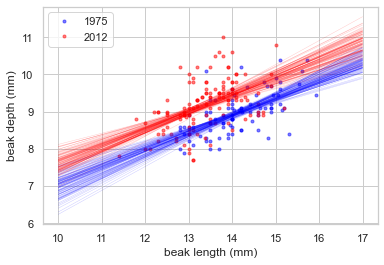

In [27]:
# scatter plot of 1975 data
plt.plot(data_75['BL'], data_75['BD'], marker='.',
             linestyle='none', color='blue', alpha=0.5)

# scatter plot of 2012 data
plt.plot(data_12['BL'], data_12['BD'], marker='.',
             linestyle='none', color='red', alpha=0.5)


plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generating x-values for bootstrap lines
x = np.array([10, 17])

# Plot of the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

plt.show()


- The values of the slope are almost the same (~0.5) suggesting that for every higher milemetere in beak length, the beak depth is half a milemetere deeper.
- The higher intercept value for the 2012 year suggests that for a given beak length the beak depth is higher, combined with the fact that the 2012 data seems shifted to the left may suggest an over all shorter deeper beaks ? to answer this question we examine the ratio of length to depth (shape) 

In [28]:
# Computing length-to-depth ratios
ratio_1975 = data_75['BL']/ data_75['BD']
ratio_2012 = data_12['BL']/ data_12['BD']

# Computing means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generating bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Computing the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55667034 1.60170971]
2012: mean ratio = 1.4658342276847778 conf int = [1.44372175 1.4875747 ]


The mean ratio values confirms the over all shape change hypothesized earlier! 